In [1]:
# Enable interactive rotation of graphs
%matplotlib widget

import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D

# Load data for activity
X = loadmat('PCA_Activity.mat')['X']
rows, cols = np.array(X.shape)
x, y, z = X

print('Rows of X = ',rows)
print('Cols of X = ',cols)

Rows of X =  3
Cols of X =  100


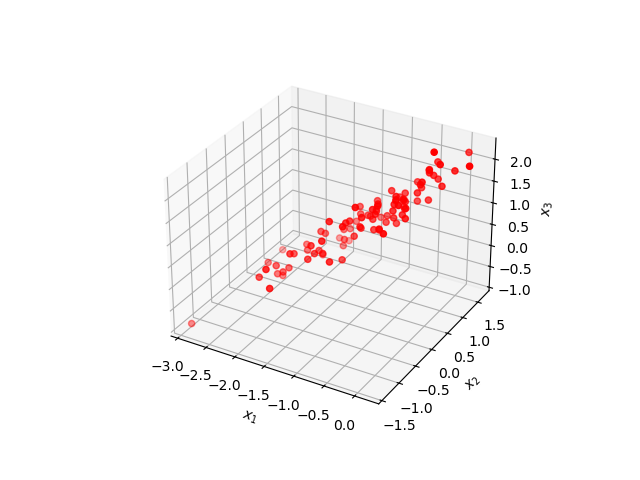

In [2]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x, y, z, c='r', marker='o')

ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$x_3$')

plt.show()

### a) Run the code to display the data in Figure the ﬁrst ﬁgure. Use the rotate tool to inspect the scatter plot from diﬀerent angles. Does the data appear to lie very close to a one-dimensional subspace? Does the data appear to be zero mean?

Yes, the data appears to lie very close to 1-dim subspace. No, it doesn't appear to be zero mean, because the center of the cluster seems to be around (-1.5, 1, 0.5).

In [3]:
# Subtract mean
X_m = X - np.mean(X, 1).reshape((3,1))
x_m, y_m, z_m = X_m

### c) Now comment out (insert %) the line of code that subtracts the mean of the data. Does the dominant feature identiﬁed by SVD continue to be a good ﬁt to the data? Comment on the importance of removing the mean before performing PCA.

No, it does not continue to be a good fit to the data anymore. Thus, we know it is important to remove the mean before performing PCA.

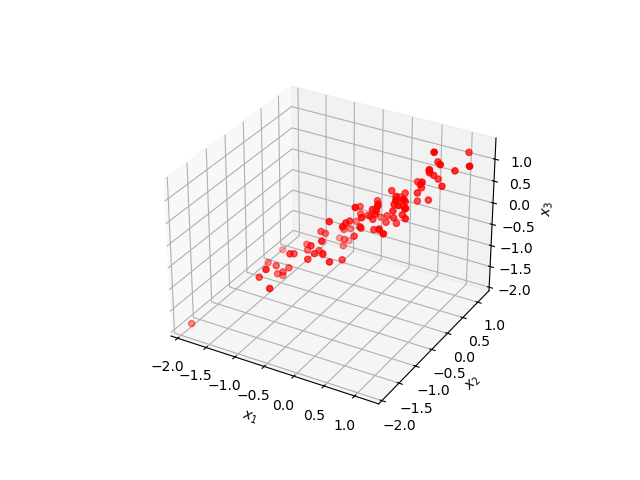

In [4]:
# display zero mean scatter plot

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x_m, y_m, z_m, c='r', marker='o')

ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$x_3$')

plt.show()

### b) Figure 2 depicts the centered data and the one-dimensional subspace that contains the dominant feature you identiﬁed using the SVD. Use the rotate tool to inspect the data and one-dimensional subspace from diﬀerent angles. Is a one-dimensional subspace a reasonable ﬁt to the data? Comment on the error.

1-dim subspace can partly reasonable fit to the data, but it cannot capture some features which data spanning on the direction orthoganal to the subspace contains.

In [5]:
# Use SVD to find first principal component

U,s,VT = np.linalg.svd(X_m,full_matrices=False)

# complete the next line of code to assign the first principal component to a
a =  U[:,0]

print(a)

[-0.58277194 -0.57701087 -0.57221964]


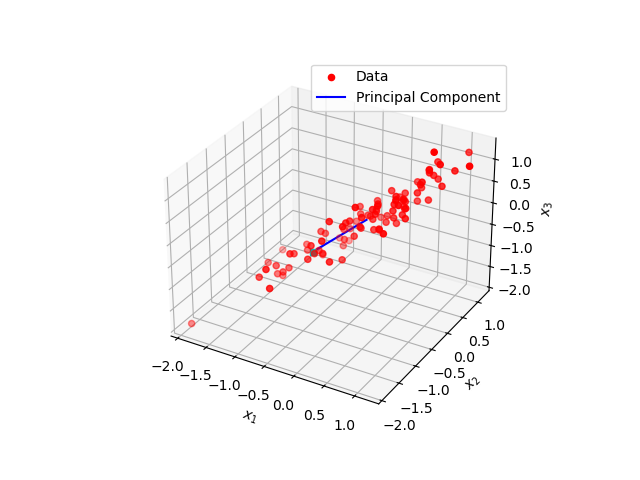

In [6]:
# display zero mean scatter plot and first principal component

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x_m, y_m, z_m, c='r', marker='o', label='Data')

ax.scatter(a[0],a[1],a[2], c='c', marker='s')

ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$x_3$')

ax.plot([0,a[0]],[0,a[1]],[0,a[2]], c='b',label='Principal Component')

ax.legend()
plt.show()